# Bit Coin Predicition

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv("bitcoin_dataset.csv")

In [4]:
print(data.head())

        Date  btc_market_price  btc_total_bitcoins  btc_market_cap  \
0  2/17/2010               0.0           2043200.0             0.0   
1  2/18/2010               0.0           2054650.0             0.0   
2  2/19/2010               0.0           2063600.0             0.0   
3  2/20/2010               0.0           2074700.0             0.0   
4  2/21/2010               0.0           2085400.0             0.0   

   btc_trade_volume  btc_blocks_size  btc_avg_block_size  \
0               0.0              0.0            0.000235   
1               0.0              0.0            0.000241   
2               0.0              0.0            0.000228   
3               0.0              0.0            0.000218   
4               0.0              0.0            0.000234   

   btc_n_orphaned_blocks  btc_n_transactions_per_block  \
0                      0                           1.0   
1                      0                           1.0   
2                      0                    

In [5]:
print(data['btc_market_price'][1023])

13.6888


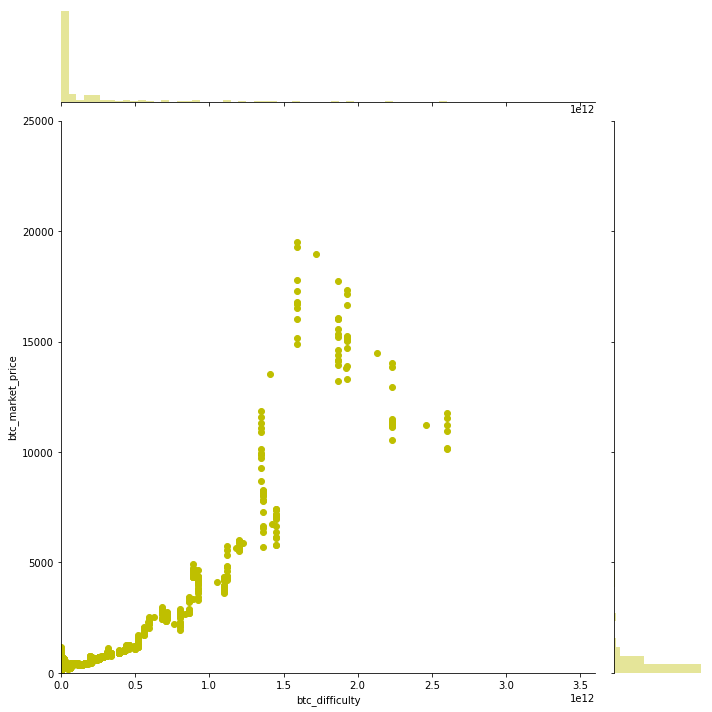

In [13]:
a = sns.jointplot( "btc_difficulty", "btc_market_price", data=data, xlim=(0, 3.6E+12), ylim=(0, 25000), color="y", size=10)

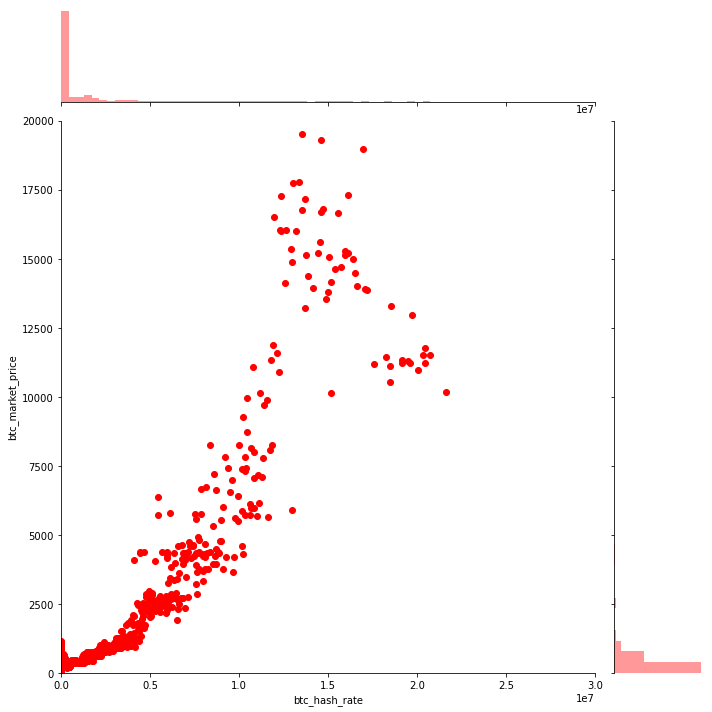

In [27]:
b = sns.jointplot( "btc_hash_rate", "btc_market_price", data=data, xlim=(0, 30000000), ylim=(0, 20000), color="r", size=10)

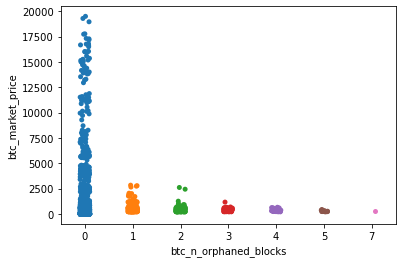

In [25]:
k = sns.stripplot(x="btc_n_orphaned_blocks",y="btc_market_price",data=data,jitter=True)

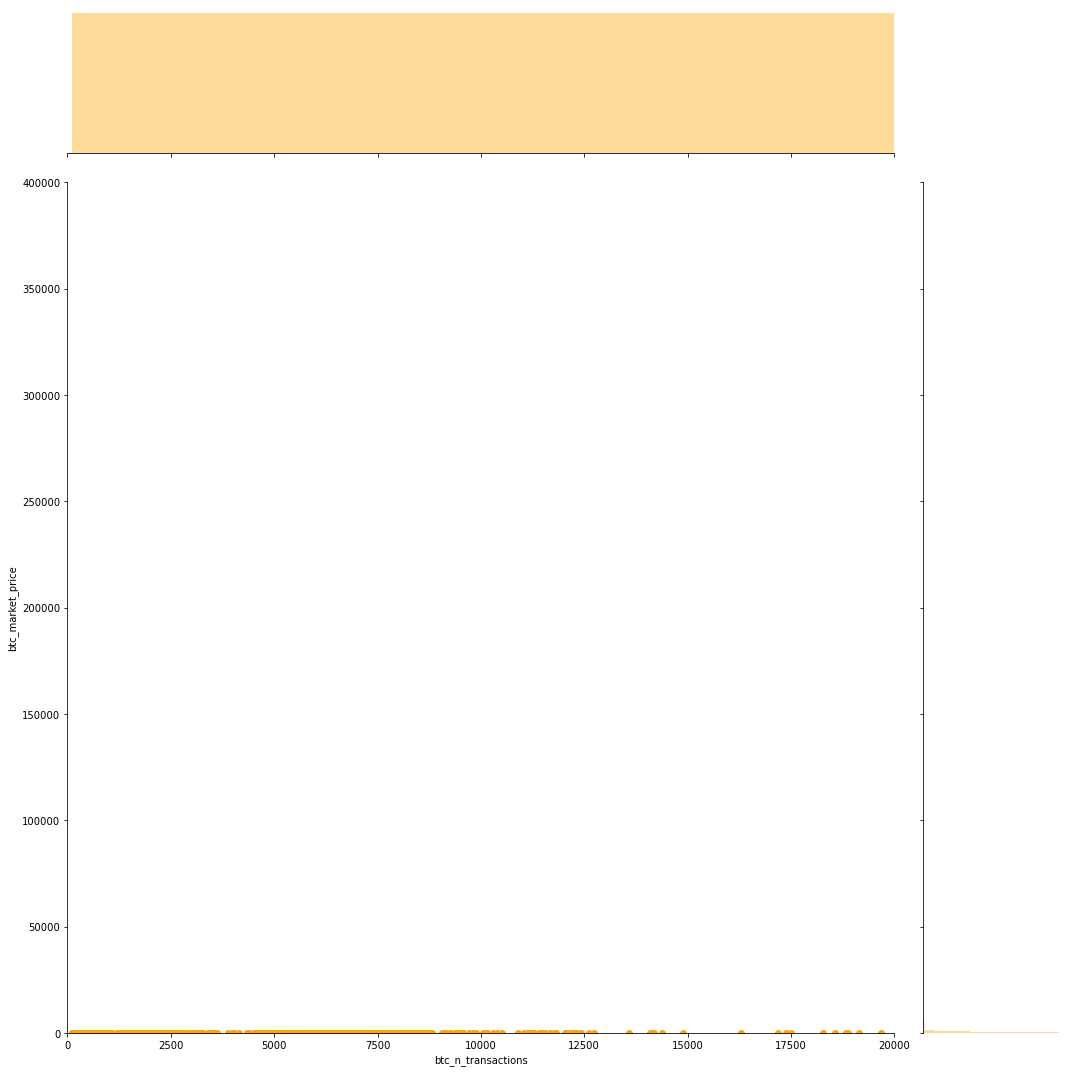

In [30]:
l = sns.jointplot("btc_n_transactions","btc_market_price", data=data, ylim=(0, 400000), xlim=(0, 20000), color="orange", size=15)

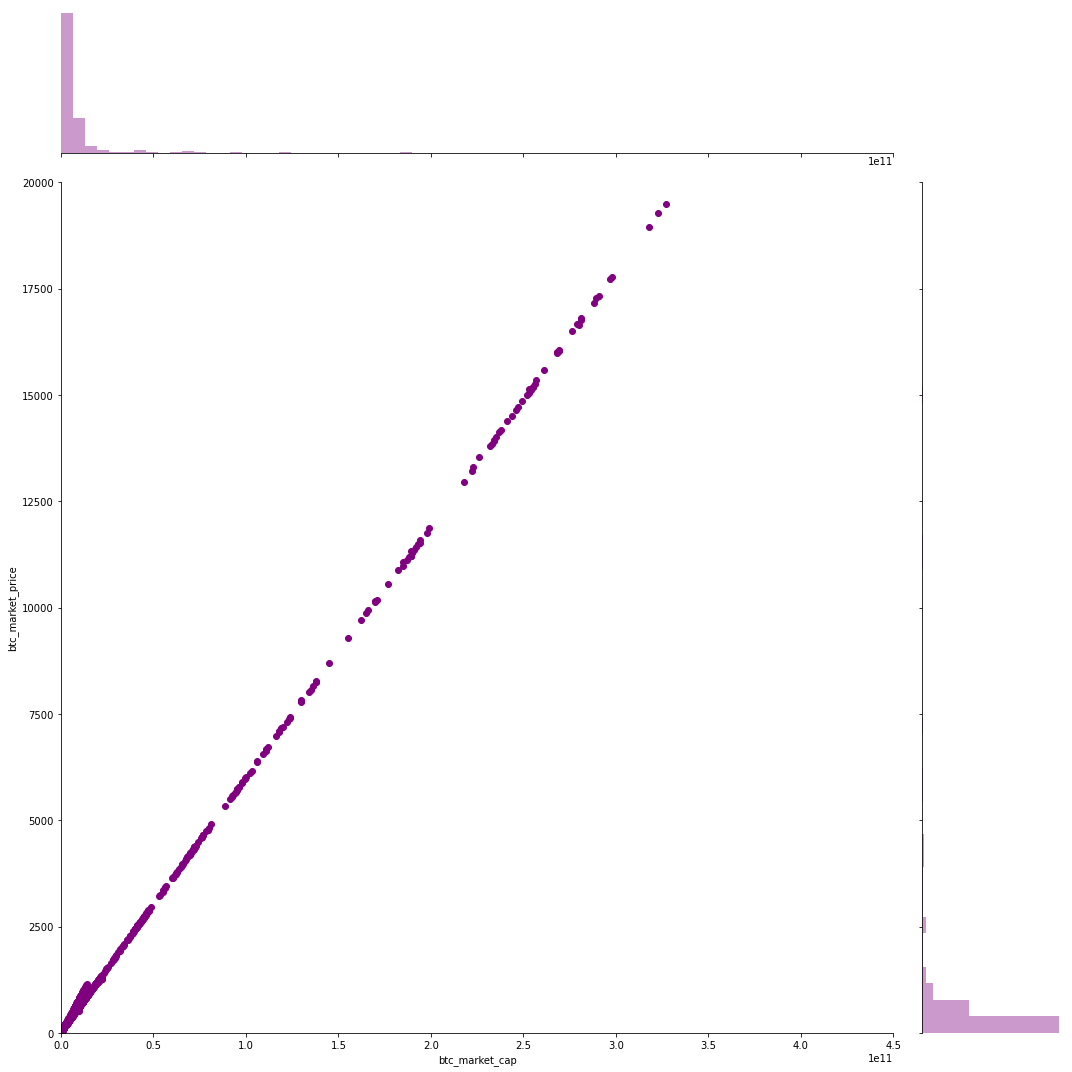

In [32]:
m = sns.jointplot("btc_market_cap", "btc_market_price", data=data, xlim=(0, 450000000000), ylim=(0, 20000), color="purple", size=15)

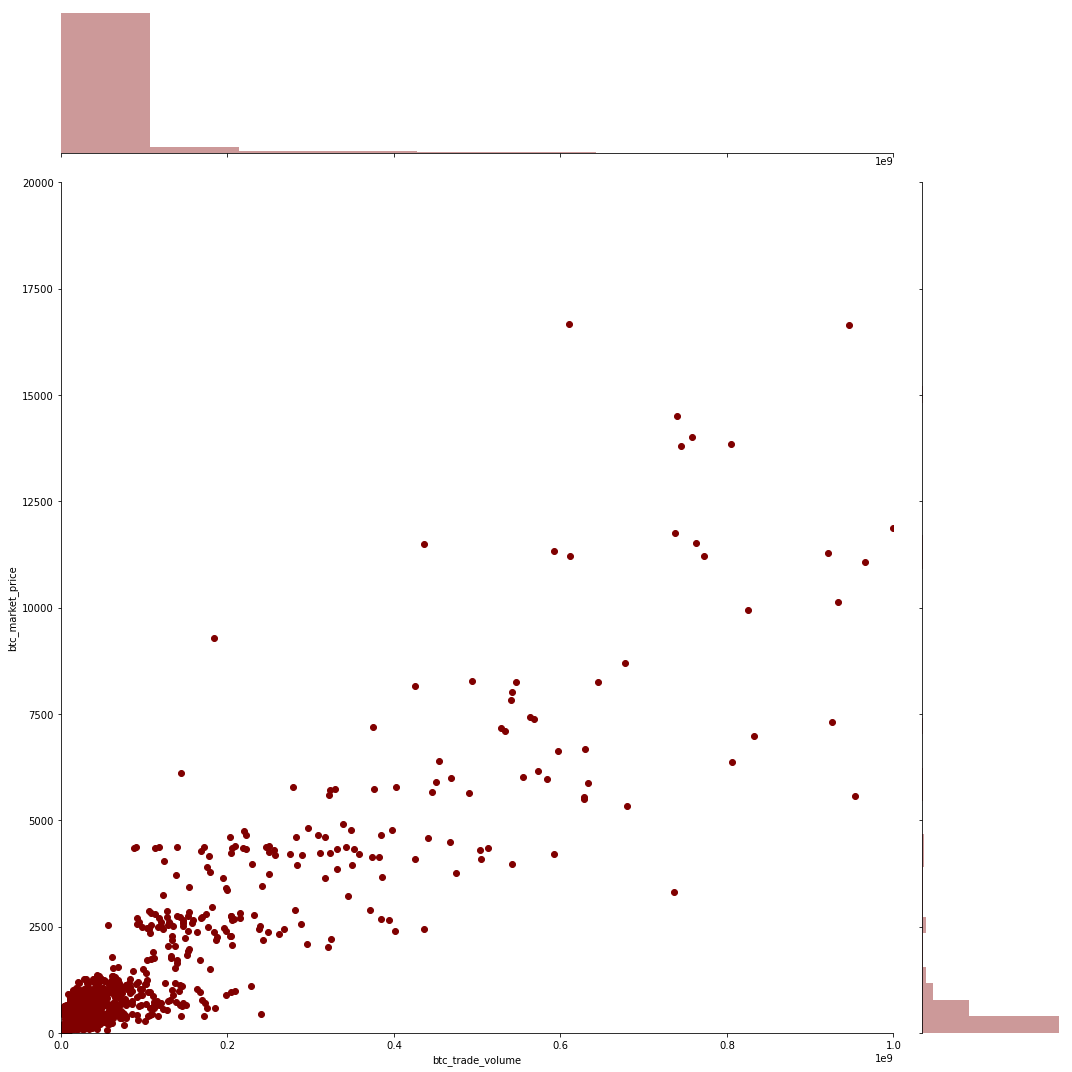

In [33]:
t = sns.jointplot("btc_trade_volume", "btc_market_price", data=data, xlim=(0, 1000000000), ylim=(0, 20000), color="maroon", size=15)

In [34]:
print(data['btc_trade_volume'].isnull().values.any())

data['btc_trade_volume'].fillna(data['btc_trade_volume'].median(),inplace = True)
data['btc_transaction_fees'].fillna(data['btc_transaction_fees'].median(),inplace = True)
data['btc_difficulty'].fillna(data['btc_difficulty'].mean(),inplace = True)

True


In [35]:
data['btc_trade_volume'].isnull().values.any()


False

In [36]:
model = smf.ols(formula='btc_market_price ~ btc_market_cap + btc_n_transactions + btc_miners_revenue + btc_cost_per_transaction + btc_difficulty + btc_hash_rate + btc_cost_per_transaction_percent', data=data).fit()

In [37]:
y = model.predict(data[['btc_market_cap','btc_cost_per_transaction_percent','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate']])

print("MSE:", sm.mean_squared_error(y, data['btc_market_price'].values))

MSE: 406.61432917838414
